# Loan Interest Prediction
---

In [1531]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
import pandas as pd
import numpy as np

In [1532]:
data = pd.read_csv('loan_data_train.csv')
data

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,74047.0,30000,30000,23.28%,60 months,other,12.10%,IL,MORTGAGE,7083.33,675-679,16,17969,1.0,10+ years
2196,63768.0,4200,4200,14.33%,60 months,car,14.16%,NJ,RENT,3850.00,700-704,4,5718,0.0,2 years
2197,94545.0,19800,19775,15.31%,60 months,debt_consolidation,15.03%,IL,MORTGAGE,6666.67,675-679,10,46879,3.0,6 years
2198,53635.0,18000,18000,20.99%,60 months,credit_card,11.63%,CA,RENT,9051.83,670-674,5,32394,2.0,4 years


In [1533]:
# Drop ID column
data.drop(columns='ID', inplace = True)

In [1534]:
# Replacing '.' with '_'
data.columns = data.columns.str.replace('.', '_')

In [1535]:
# Check in any whitespace
whitespace = any(data.columns.str.isspace())

if whitespace:
    print("True - There are whitespaces")
else:
    print("False - There are no whitespaces")

False - There are no whitespaces


In [1536]:
data.isnull().sum()

Amount_Requested                   1
Amount_Funded_By_Investors         1
Interest_Rate                      0
Loan_Length                        1
Loan_Purpose                       1
Debt_To_Income_Ratio               1
State                              1
Home_Ownership                     1
Monthly_Income                     3
FICO_Range                         0
Open_CREDIT_Lines                  4
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 69
dtype: int64

In [1537]:
# Dropping Null values
data.dropna(inplace = True)

In [1538]:
# Collect all 'object' types
objects = []
for cols in data:
    if data[cols].dtypes == 'object':
        objects.append(cols)
        
print(objects)

['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate', 'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State', 'Home_Ownership', 'FICO_Range', 'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance', 'Employment_Length']


In [1539]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2118 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2118 non-null   object 
 1   Amount_Funded_By_Investors      2118 non-null   object 
 2   Interest_Rate                   2118 non-null   object 
 3   Loan_Length                     2118 non-null   object 
 4   Loan_Purpose                    2118 non-null   object 
 5   Debt_To_Income_Ratio            2118 non-null   object 
 6   State                           2118 non-null   object 
 7   Home_Ownership                  2118 non-null   object 
 8   Monthly_Income                  2118 non-null   float64
 9   FICO_Range                      2118 non-null   object 
 10  Open_CREDIT_Lines               2118 non-null   object 
 11  Revolving_CREDIT_Balance        2118 non-null   object 
 12  Inquiries_in_the_Last_6_Months  2118 no

In [1540]:
obj_to_float = ['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate', 
                'Debt_To_Income_Ratio', 'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance']

# data[obj_to_float] = data[obj_to_float].astype(int)
# ValueError: could not convert string to float: '.'

In [1541]:
# Count values which are in the string format (object) from all cols which has '.'
float_values = data[obj_to_float]

values_with_dot = []

for column in float_values:
    for value in float_values[column]:
        if '.' in str(value):
            values_with_dot.append(value)

print("Count of values with dot:", len(values_with_dot))

Count of values with dot: 4366


In [1542]:
for column in obj_to_float:
    data[column] = pd.to_numeric(data[column].replace('[^\d.]', '', regex=True), errors='coerce').astype(float)

In [1543]:
# It's okay to drop a few rows if data consists more than 2K rows  
data.isnull().sum()
data.dropna(inplace = True)

In [1544]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2106 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2106 non-null   float64
 1   Amount_Funded_By_Investors      2106 non-null   float64
 2   Interest_Rate                   2106 non-null   float64
 3   Loan_Length                     2106 non-null   object 
 4   Loan_Purpose                    2106 non-null   object 
 5   Debt_To_Income_Ratio            2106 non-null   float64
 6   State                           2106 non-null   object 
 7   Home_Ownership                  2106 non-null   object 
 8   Monthly_Income                  2106 non-null   float64
 9   FICO_Range                      2106 non-null   object 
 10  Open_CREDIT_Lines               2106 non-null   float64
 11  Revolving_CREDIT_Balance        2106 non-null   float64
 12  Inquiries_in_the_Last_6_Months  2106 no

In [1545]:
objects = []
for cols in data:
    if data[cols].dtypes == 'object':
        objects.append(cols)
        
print(objects)

['Loan_Length', 'Loan_Purpose', 'State', 'Home_Ownership', 'FICO_Range', 'Employment_Length']


In [1546]:
# Check unique values of all 'Object' types
for column in data.columns:
    if data[column].dtype == 'object':
        num_distinct_values = len(data[column].unique())
        print(f"{column} - {num_distinct_values} distinct values")

Loan_Length - 3 distinct values
Loan_Purpose - 14 distinct values
State - 45 distinct values
Home_Ownership - 4 distinct values
FICO_Range - 38 distinct values
Employment_Length - 12 distinct values


### Dropping needless categorical values

In [1547]:
data['Loan_Length'].value_counts()

Loan_Length
36 months    1640
60 months     465
.               1
Name: count, dtype: int64

In [1548]:
data = data[data['Loan_Length'] != '.']

In [1549]:
data['Loan_Length'].value_counts()

Loan_Length
36 months    1640
60 months     465
Name: count, dtype: int64

In [1550]:
data['Home_Ownership'].value_counts()

Home_Ownership
MORTGAGE    973
RENT        960
OWN         168
OTHER         4
Name: count, dtype: int64

In [1551]:
data = data[data['Home_Ownership'] != 'OTHER']

In [1552]:
data['Home_Ownership'].value_counts()

Home_Ownership
MORTGAGE    973
RENT        960
OWN         168
Name: count, dtype: int64

In [1553]:
data['Employment_Length'].value_counts()

Employment_Length
10+ years    570
< 1 year     225
2 years      213
3 years      201
5 years      178
4 years      160
1 year       157
6 years      131
7 years      106
8 years       94
9 years       65
.              1
Name: count, dtype: int64

In [1554]:
data = data[data['Employment_Length'] != '.']

In [1555]:
data['Employment_Length'].value_counts()

Employment_Length
10+ years    570
< 1 year     225
2 years      213
3 years      201
5 years      178
4 years      160
1 year       157
6 years      131
7 years      106
8 years       94
9 years       65
Name: count, dtype: int64

In [1556]:
for column in data.columns:
    if data[column].dtype == 'object':
        num_distinct_values = len(data[column].unique())
        print(f"{column} - {num_distinct_values} distinct values")

Loan_Length - 2 distinct values
Loan_Purpose - 14 distinct values
State - 44 distinct values
Home_Ownership - 3 distinct values
FICO_Range - 38 distinct values
Employment_Length - 11 distinct values


In [1557]:
data['Loan_Length'] = data['Loan_Length'].str.extract('(\d+)').astype(float)

In [1558]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2100 non-null   float64
 1   Amount_Funded_By_Investors      2100 non-null   float64
 2   Interest_Rate                   2100 non-null   float64
 3   Loan_Length                     2100 non-null   float64
 4   Loan_Purpose                    2100 non-null   object 
 5   Debt_To_Income_Ratio            2100 non-null   float64
 6   State                           2100 non-null   object 
 7   Home_Ownership                  2100 non-null   object 
 8   Monthly_Income                  2100 non-null   float64
 9   FICO_Range                      2100 non-null   object 
 10  Open_CREDIT_Lines               2100 non-null   float64
 11  Revolving_CREDIT_Balance        2100 non-null   float64
 12  Inquiries_in_the_Last_6_Months  2100 no

In [1559]:
data['Loan_Purpose'].value_counts()

Loan_Purpose
debt_consolidation    1105
credit_card            375
other                  158
home_improvement       127
major_purchase          81
small_business          75
car                     44
wedding                 35
moving                  24
medical                 24
house                   19
vacation                17
educational             13
renewable_energy         3
Name: count, dtype: int64

### Data Visualization

In [1560]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

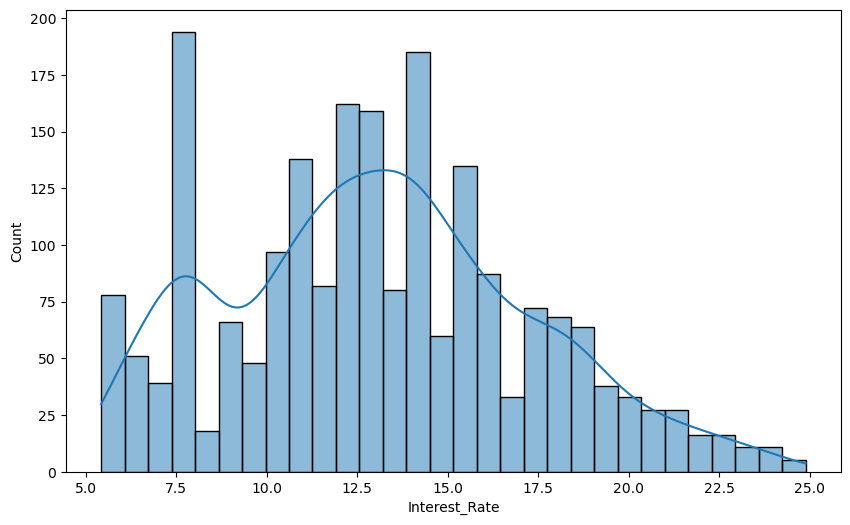

In [1561]:
# Check the distribution of target  
plt.figure(figsize=(10, 6))
sns.histplot(data['Interest_Rate'], kde = True, bins=30)
plt.show()

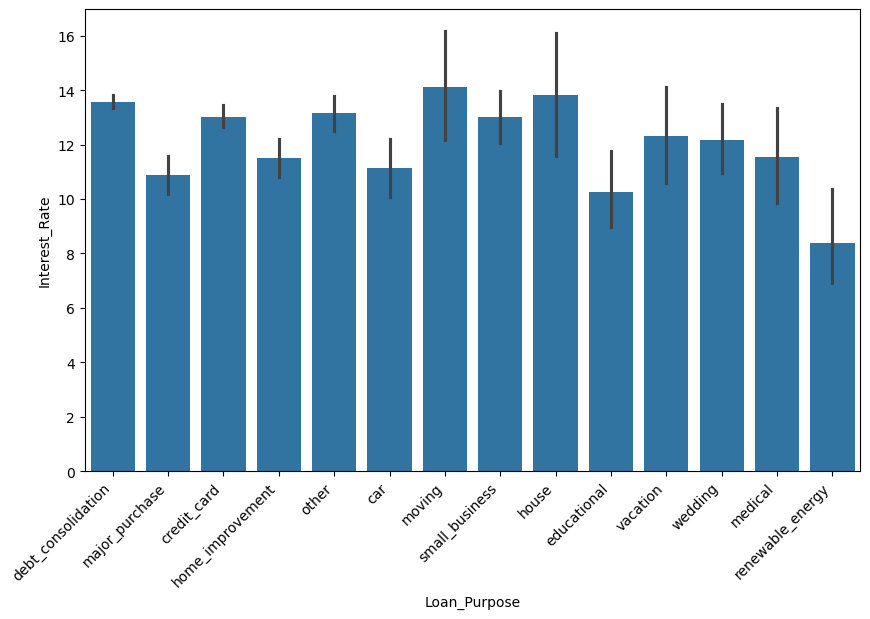

In [1562]:
# Check the loan purpose distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Loan_Purpose', y='Interest_Rate', data=data)
plt.xticks(rotation=45, ha='right')
plt.show()

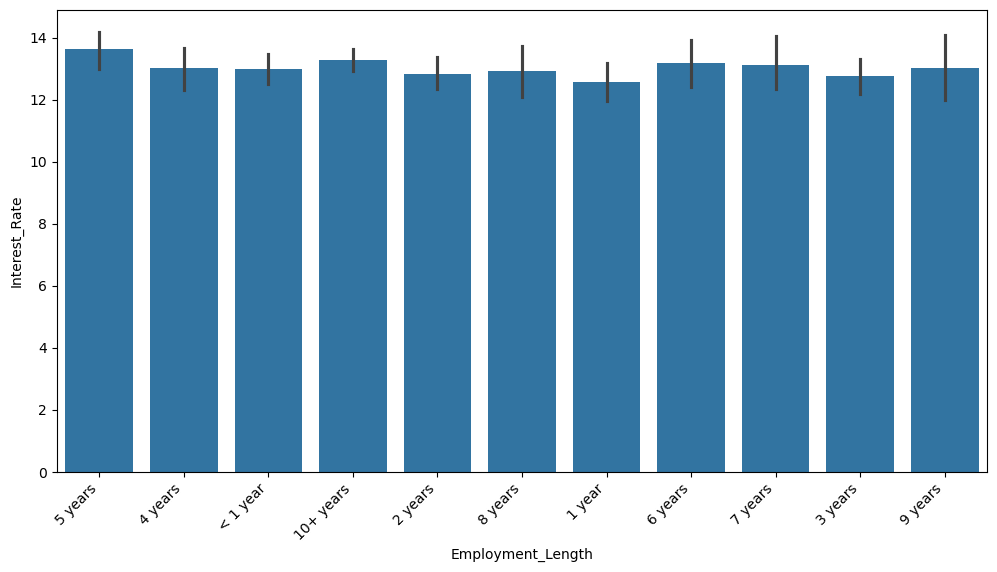

In [1563]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Employment_Length', y='Interest_Rate', data=data)
plt.xticks(rotation=45, ha='right')
plt.show()

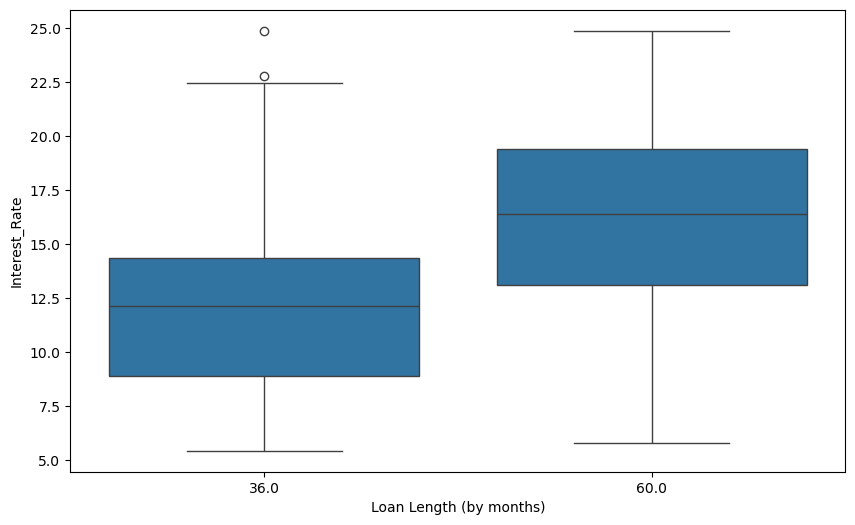

In [1564]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Length', y='Interest_Rate', data=data)
plt.xlabel("Loan Length (by months)")
plt.show()

In [1565]:
# TBD

In [1566]:
# TBD

In [1567]:
# TBD

### CheckPoint-1 (dealing with dtype = 'object')

In [1568]:
data

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11.0,15210.0,3.0,5 years
1,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14.0,19070.0,3.0,4 years
2,2100.0,2100.00,14.33,36.0,major_purchase,3.50,LA,OWN,1000.00,690-694,13.0,893.0,1.0,< 1 year
3,28000.0,28000.00,16.29,36.0,credit_card,19.62,NV,MORTGAGE,7083.33,710-714,12.0,38194.0,1.0,10+ years
4,24250.0,17431.82,12.23,60.0,credit_card,23.79,OH,MORTGAGE,5833.33,730-734,6.0,31061.0,2.0,10+ years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,23.28,60.0,other,12.10,IL,MORTGAGE,7083.33,675-679,16.0,17969.0,1.0,10+ years
2196,4200.0,4200.00,14.33,60.0,car,14.16,NJ,RENT,3850.00,700-704,4.0,5718.0,0.0,2 years
2197,19800.0,19775.00,15.31,60.0,debt_consolidation,15.03,IL,MORTGAGE,6666.67,675-679,10.0,46879.0,3.0,6 years
2198,18000.0,18000.00,20.99,60.0,credit_card,11.63,CA,RENT,9051.83,670-674,5.0,32394.0,2.0,4 years


In [1569]:
data = data.rename(columns = {'Loan_Length' : 'Loan_Length_by_month'})

In [1570]:
for column in data.columns:
    if data[column].dtype == 'object':
        num_distinct_values = len(data[column].unique())
        print(f"{column} - {num_distinct_values} distinct values")

Loan_Purpose - 14 distinct values
State - 44 distinct values
Home_Ownership - 3 distinct values
FICO_Range - 38 distinct values
Employment_Length - 11 distinct values


In [1571]:
for col in data:
    if data[col].dtypes == 'object':
        print(col ,data[col].unique())

Loan_Purpose ['debt_consolidation' 'major_purchase' 'credit_card' 'home_improvement'
 'other' 'car' 'moving' 'small_business' 'house' 'educational' 'vacation'
 'wedding' 'medical' 'renewable_energy']
State ['VA' 'NY' 'LA' 'NV' 'OH' 'CA' 'IL' 'NJ' 'WA' 'NC' 'CT' 'AK' 'MA' 'TX'
 'VT' 'OK' 'FL' 'NH' 'GA' 'MN' 'MD' 'WY' 'PA' 'AL' 'AZ' 'SC' 'MI' 'OR'
 'RI' 'NM' 'CO' 'MO' 'WI' 'KY' 'UT' 'AR' 'WV' 'DE' 'MT' 'KS' 'DC' 'SD'
 'HI' 'IN']
Home_Ownership ['MORTGAGE' 'OWN' 'RENT']
FICO_Range ['720-724' '710-714' '690-694' '730-734' '665-669' '735-739' '800-804'
 '680-684' '745-749' '660-664' '670-674' '705-709' '695-699' '715-719'
 '760-764' '685-689' '785-789' '755-759' '675-679' '775-779' '740-744'
 '725-729' '640-644' '790-794' '765-769' '770-774' '700-704' '750-754'
 '810-814' '815-819' '780-784' '820-824' '795-799' '805-809' '645-649'
 '655-659' '830-834' '650-654']
Employment_Length ['5 years' '4 years' '< 1 year' '10+ years' '2 years' '8 years' '1 year'
 '6 years' '7 years' '3 years' '9 years

| West                  | Midwest                   | South                     | Northeast                   |
|-----------------------|---------------------------|---------------------------|-----------------------------|
| California (CA)       | Illinois (IL)             | Texas (TX)                | New York (NY)               |
| Washington (WA)       | Ohio (OH)                 | Florida (FL)              | Pennsylvania (PA)           |
| Arizona (AZ)          | Michigan (MI)             | Georgia (GA)              | New Jersey (NJ)             |
| Nevada (NV)           | Missouri (MO)             | Virginia (VA)             | Massachusetts (MA)         |
| Oregon (OR)           | Minnesota (MN)            | North Carolina (NC)       | Maryland (MD)               |
| Colorado (CO)         | Wisconsin (WI)            | Alabama (AL)              | Connecticut (CT)            |
| Utah (UT)             | Kentucky (KY)             | South Carolina (SC)       | New Hampshire (NH)          |
| Alaska (AK)           | Oklahoma (OK)             | Louisiana (LA)            | Rhode Island (RI)           |
| Hawaii (HI)           | Kansas (KS)               | Mississippi (MS)          | Vermont (VT)                |
| Montana (MT)          | Iowa (IA)                 | Arkansas (AR)             | Delaware (DE)               |
| Idaho (ID)            | Indiana (IN)              | Tennessee (TN)            |                             |
| Wyoming (WY)          | South Dakota (SD)         | Kentucky (KY)             |                             |
| New Mexico (NM)       | North Dakota (ND)         |                           |                             |


In [1572]:
data1 = data.copy()

In [1573]:
state_regions = {
    'West': ['CA', 'WA', 'AZ', 'NV', 'OR', 'CO', 'UT', 'AK', 'HI', 'MT', 'ID', 'WY', 'NM'],
    'Midwest': ['IL', 'OH', 'MI', 'MO', 'MN', 'WI', 'KY', 'OK', 'KS', 'IA', 'IN', 'SD', 'ND', 'NE'],
    'South': ['TX', 'FL', 'GA', 'VA', 'NC', 'AL', 'SC', 'LA', 'MS', 'AR', 'TN', 'KY'],
    'Northeast': ['NY', 'PA', 'NJ', 'MA', 'MD', 'CT', 'NH', 'RI', 'VT', 'DE'],
    'District of Columbia': ['DC']
}

data1['Region'] = data1['State'].map({state: region for region, states in state_regions.items() for state in states})

In [1574]:
data1.isnull().sum()

Amount_Requested                   0
Amount_Funded_By_Investors         0
Interest_Rate                      0
Loan_Length_by_month               0
Loan_Purpose                       0
Debt_To_Income_Ratio               0
State                              0
Home_Ownership                     0
Monthly_Income                     0
FICO_Range                         0
Open_CREDIT_Lines                  0
Revolving_CREDIT_Balance           0
Inquiries_in_the_Last_6_Months     0
Employment_Length                  0
Region                            10
dtype: int64

In [1575]:
data1.dropna(inplace = True)

In [1576]:
data1.drop(columns='State', inplace = True)

In [1577]:
data1.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length_by_month,Loan_Purpose,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Region
0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,MORTGAGE,8606.56,720-724,11.0,15210.0,3.0,5 years,South
1,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,MORTGAGE,6737.50,710-714,14.0,19070.0,3.0,4 years,Northeast
2,2100.0,2100.00,14.33,36.0,major_purchase,3.50,OWN,1000.00,690-694,13.0,893.0,1.0,< 1 year,South
3,28000.0,28000.00,16.29,36.0,credit_card,19.62,MORTGAGE,7083.33,710-714,12.0,38194.0,1.0,10+ years,West
4,24250.0,17431.82,12.23,60.0,credit_card,23.79,MORTGAGE,5833.33,730-734,6.0,31061.0,2.0,10+ years,Midwest


In [1578]:
data1['Loan_Purpose'].value_counts()

Loan_Purpose
debt_consolidation    1098
credit_card            374
other                  158
home_improvement       126
major_purchase          81
small_business          75
car                     43
wedding                 35
moving                  24
medical                 24
house                   19
vacation                17
educational             13
renewable_energy         3
Name: count, dtype: int64

In [1579]:
# Dictionary to map loan purposes to groups
loan_purpose_groups = {
    'Debt_Related': ['debt_consolidation', 'credit_card'],
    'Personal_Expenses': ['home_improvement', 'house', 'car', 'wedding', 'medical', 'vacation', 'educational'],
    'Business': ['small_business', 'major_purchase'],
    'Others': ['moving','other']
}

data1['Grouped_Loan_Purpose'] = data1['Loan_Purpose'].apply(lambda purpose: next((group for group, purposes in loan_purpose_groups.items() if purpose in purposes), 'Other'))

In [1580]:
data1.drop('Loan_Purpose', axis=1, inplace=True)

In [1581]:
data1.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length_by_month,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Region,Grouped_Loan_Purpose
0,25000.0,25000.00,18.49,60.0,27.56,MORTGAGE,8606.56,720-724,11.0,15210.0,3.0,5 years,South,Debt_Related
1,19750.0,19750.00,17.27,60.0,13.39,MORTGAGE,6737.50,710-714,14.0,19070.0,3.0,4 years,Northeast,Debt_Related
2,2100.0,2100.00,14.33,36.0,3.50,OWN,1000.00,690-694,13.0,893.0,1.0,< 1 year,South,Business
3,28000.0,28000.00,16.29,36.0,19.62,MORTGAGE,7083.33,710-714,12.0,38194.0,1.0,10+ years,West,Debt_Related
4,24250.0,17431.82,12.23,60.0,23.79,MORTGAGE,5833.33,730-734,6.0,31061.0,2.0,10+ years,Midwest,Debt_Related


In [1582]:
bucket_ranges = [(300, 579), (580, 669), (670, 739), (740, 799), (800, 850)]
bucket_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
def map_fico_to_bucket(score):
    for i, (lower, upper) in enumerate(bucket_ranges):
        if lower <= score <= upper:
            return bucket_labels[i]
    return 'Unknown'

In [1583]:
data1['FICO_Score'] = data1['FICO_Range'].apply(lambda x: map_fico_to_bucket(sum(map(int, x.split('-'))) / 2))

In [1584]:
data1.drop('FICO_Range', axis=1, inplace=True)

In [1585]:
data1.describe()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length_by_month,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
count,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000
mean,12628.444976,12195.099569,13.073282,41.293780,15.370474,5780.352105,10.095215,15404.505263,0.899043
std,7806.542574,7743.037698,4.153958,9.953593,7.468398,4128.650396,4.481655,18789.671337,1.224393
min,1000.000000,0.000000,5.420000,36.000000,0.000000,588.500000,2.000000,0.000000,0.000000
25%,6500.000000,6000.000000,10.160000,36.000000,9.742500,3500.000000,7.000000,5640.000000,0.000000
50%,10500.000000,10000.000000,13.110000,36.000000,15.205000,5000.000000,9.000000,11072.000000,0.000000
75%,17387.500000,16468.750000,15.800000,36.000000,20.657500,6925.265000,13.000000,18958.500000,1.000000
max,35000.000000,35000.000000,24.890000,60.000000,34.910000,102750.000000,38.000000,270800.000000,9.000000


In [1586]:
for column in data1.columns:
    if data1[column].dtype == 'object':
        num_distinct_values = len(data1[column].unique())
        print(f"{column} - {num_distinct_values} distinct values")

Home_Ownership - 3 distinct values
Employment_Length - 11 distinct values
Region - 5 distinct values
Grouped_Loan_Purpose - 5 distinct values
FICO_Score - 4 distinct values


In [1587]:
data1['Employment_Length'].value_counts()

Employment_Length
10+ years    568
< 1 year     223
2 years      212
3 years      200
5 years      177
4 years      159
1 year       156
6 years      131
7 years      105
8 years       94
9 years       65
Name: count, dtype: int64

In [1588]:
employment_length_groups = {
    'Junior': ['< 1 year'],
    'Mid-Level': ['1 year', '2 years', '3 years', '4 years'],
    'Mid-Senior': ['5 years', '6 years', '7 years'],
    'Senior': ['8 years', '9 years', '10+ years']
}

def map_to_group(length):
    for group, lengths in employment_length_groups.items():
        if any(substring in length for substring in lengths):
            return group
    return 'Unknown'

In [1589]:
data1['Employment_Group'] = data1['Employment_Length'].apply(map_to_group)

In [1590]:
data1.drop('Employment_Length', axis=1, inplace=True)

In [1591]:
data1.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length_by_month,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Region,Grouped_Loan_Purpose,FICO_Score,Employment_Group
0,25000.0,25000.00,18.49,60.0,27.56,MORTGAGE,8606.56,11.0,15210.0,3.0,South,Debt_Related,Good,Mid-Senior
1,19750.0,19750.00,17.27,60.0,13.39,MORTGAGE,6737.50,14.0,19070.0,3.0,Northeast,Debt_Related,Good,Mid-Level
2,2100.0,2100.00,14.33,36.0,3.50,OWN,1000.00,13.0,893.0,1.0,South,Business,Good,Junior
3,28000.0,28000.00,16.29,36.0,19.62,MORTGAGE,7083.33,12.0,38194.0,1.0,West,Debt_Related,Good,Senior
4,24250.0,17431.82,12.23,60.0,23.79,MORTGAGE,5833.33,6.0,31061.0,2.0,Midwest,Debt_Related,Good,Senior


In [1592]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2090 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2090 non-null   float64
 1   Amount_Funded_By_Investors      2090 non-null   float64
 2   Interest_Rate                   2090 non-null   float64
 3   Loan_Length_by_month            2090 non-null   float64
 4   Debt_To_Income_Ratio            2090 non-null   float64
 5   Home_Ownership                  2090 non-null   object 
 6   Monthly_Income                  2090 non-null   float64
 7   Open_CREDIT_Lines               2090 non-null   float64
 8   Revolving_CREDIT_Balance        2090 non-null   float64
 9   Inquiries_in_the_Last_6_Months  2090 non-null   float64
 10  Region                          2090 non-null   object 
 11  Grouped_Loan_Purpose            2090 non-null   object 
 12  FICO_Score                      2090 no

In [1593]:
for column in data1.columns:
    if data1[column].dtype == 'object':
        num_distinct_values = len(data1[column].unique())
        print(f"{column} - {num_distinct_values} distinct values")

Home_Ownership - 3 distinct values
Region - 5 distinct values
Grouped_Loan_Purpose - 5 distinct values
FICO_Score - 4 distinct values
Employment_Group - 4 distinct values


In [1594]:
data1.duplicated().value_counts()

False    2090
Name: count, dtype: int64

In [1595]:
data1.shape

(2090, 14)

In [1596]:
data1.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length_by_month,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Region,Grouped_Loan_Purpose,FICO_Score,Employment_Group
0,25000.0,25000.00,18.49,60.0,27.56,MORTGAGE,8606.56,11.0,15210.0,3.0,South,Debt_Related,Good,Mid-Senior
1,19750.0,19750.00,17.27,60.0,13.39,MORTGAGE,6737.50,14.0,19070.0,3.0,Northeast,Debt_Related,Good,Mid-Level
2,2100.0,2100.00,14.33,36.0,3.50,OWN,1000.00,13.0,893.0,1.0,South,Business,Good,Junior
3,28000.0,28000.00,16.29,36.0,19.62,MORTGAGE,7083.33,12.0,38194.0,1.0,West,Debt_Related,Good,Senior
4,24250.0,17431.82,12.23,60.0,23.79,MORTGAGE,5833.33,6.0,31061.0,2.0,Midwest,Debt_Related,Good,Senior


In [1597]:
data1.describe()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length_by_month,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
count,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000
mean,12628.444976,12195.099569,13.073282,41.293780,15.370474,5780.352105,10.095215,15404.505263,0.899043
std,7806.542574,7743.037698,4.153958,9.953593,7.468398,4128.650396,4.481655,18789.671337,1.224393
min,1000.000000,0.000000,5.420000,36.000000,0.000000,588.500000,2.000000,0.000000,0.000000
25%,6500.000000,6000.000000,10.160000,36.000000,9.742500,3500.000000,7.000000,5640.000000,0.000000
50%,10500.000000,10000.000000,13.110000,36.000000,15.205000,5000.000000,9.000000,11072.000000,0.000000
75%,17387.500000,16468.750000,15.800000,36.000000,20.657500,6925.265000,13.000000,18958.500000,1.000000
max,35000.000000,35000.000000,24.890000,60.000000,34.910000,102750.000000,38.000000,270800.000000,9.000000


#### All looks good, let's visualize the data again

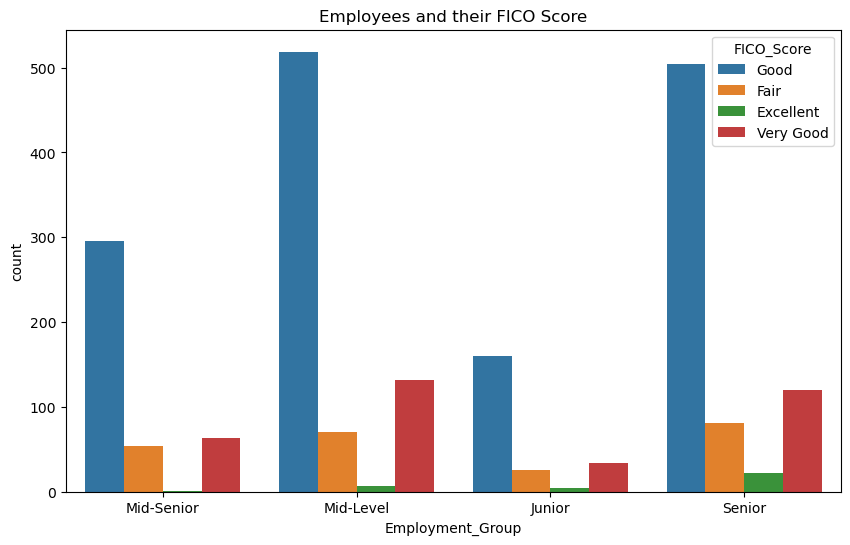

In [1598]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Employment_Group', data = data1, hue='FICO_Score')
plt.title("Employees and their FICO Score")
plt.show()

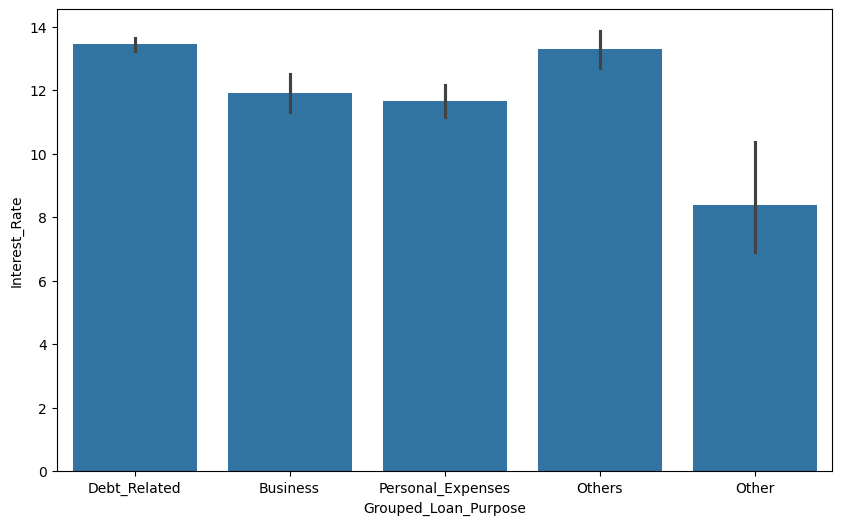

In [1599]:
# Check the grouped loan purpose distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Grouped_Loan_Purpose', y='Interest_Rate', data=data1)
# plt.xticks(rotation=45, ha='right')
plt.show()

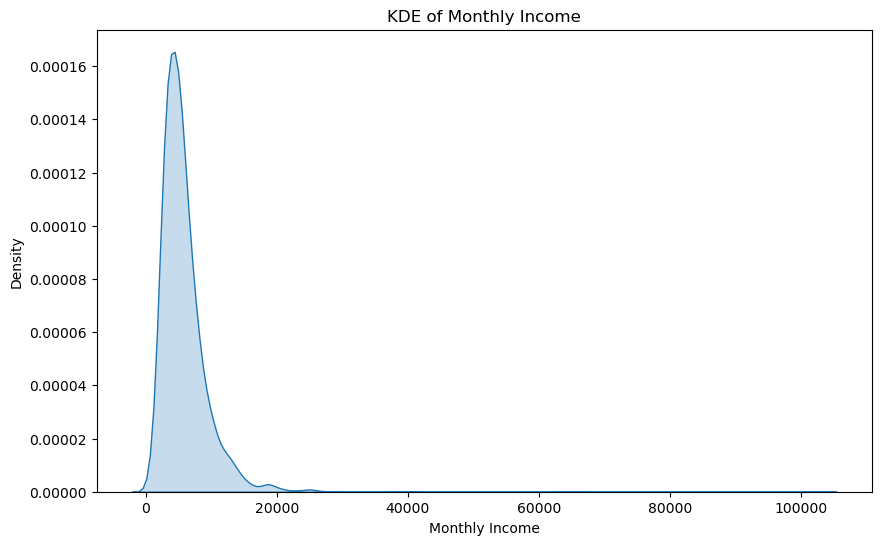

In [1600]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data1['Monthly_Income'], fill=True)
plt.title('KDE of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.show()

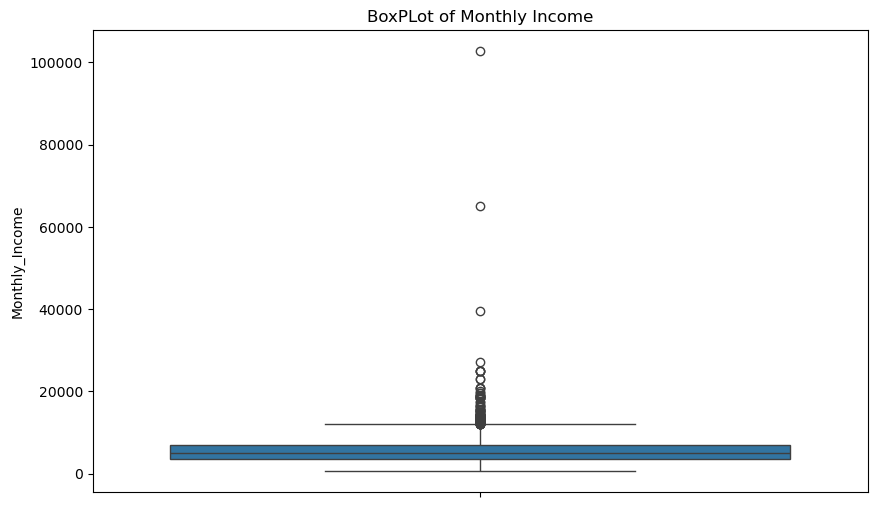

In [1601]:
plt.figure(figsize=(10, 6))
sns.boxplot(data1['Monthly_Income'])
plt.title('BoxPLot of Monthly Income')
plt.show()

In [1602]:
data1[data1['Monthly_Income'] >= 30000]

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length_by_month,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Region,Grouped_Loan_Purpose,FICO_Score,Employment_Group
516,4500.0,4500.0,6.91,36.0,0.58,MORTGAGE,65000.00,7.0,3015.0,4.0,Northeast,Business,Good,Mid-Senior
803,35000.0,35000.0,16.29,36.0,17.17,MORTGAGE,39583.33,14.0,55965.0,2.0,Northeast,Debt_Related,Good,Senior
1621,33000.0,33000.0,7.62,36.0,0.26,MORTGAGE,102750.00,7.0,95435.0,0.0,Northeast,Debt_Related,Excellent,Senior


### Scaling

In [1603]:
data1.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length_by_month,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Region,Grouped_Loan_Purpose,FICO_Score,Employment_Group
0,25000.0,25000.00,18.49,60.0,27.56,MORTGAGE,8606.56,11.0,15210.0,3.0,South,Debt_Related,Good,Mid-Senior
1,19750.0,19750.00,17.27,60.0,13.39,MORTGAGE,6737.50,14.0,19070.0,3.0,Northeast,Debt_Related,Good,Mid-Level
2,2100.0,2100.00,14.33,36.0,3.50,OWN,1000.00,13.0,893.0,1.0,South,Business,Good,Junior
3,28000.0,28000.00,16.29,36.0,19.62,MORTGAGE,7083.33,12.0,38194.0,1.0,West,Debt_Related,Good,Senior
4,24250.0,17431.82,12.23,60.0,23.79,MORTGAGE,5833.33,6.0,31061.0,2.0,Midwest,Debt_Related,Good,Senior


In [1604]:
objects = []
for cols in data1:
    if data1[cols].dtypes == 'object':
        objects.append(cols)
        
print(objects)

['Home_Ownership', 'Region', 'Grouped_Loan_Purpose', 'FICO_Score', 'Employment_Group']


In [1605]:
from sklearn.preprocessing import OrdinalEncoder
columns_to_encode = ['Home_Ownership', 'Region', 'Grouped_Loan_Purpose', 'FICO_Score', 
                     'Employment_Group', 'Loan_Length_by_month']
ordinal_encoder = OrdinalEncoder()
data1[columns_to_encode] = ordinal_encoder.fit_transform(data1[columns_to_encode])

In [1606]:
data1[columns_to_encode] = data1[columns_to_encode].astype('int64')

In [1607]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2090 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2090 non-null   float64
 1   Amount_Funded_By_Investors      2090 non-null   float64
 2   Interest_Rate                   2090 non-null   float64
 3   Loan_Length_by_month            2090 non-null   int64  
 4   Debt_To_Income_Ratio            2090 non-null   float64
 5   Home_Ownership                  2090 non-null   int64  
 6   Monthly_Income                  2090 non-null   float64
 7   Open_CREDIT_Lines               2090 non-null   float64
 8   Revolving_CREDIT_Balance        2090 non-null   float64
 9   Inquiries_in_the_Last_6_Months  2090 non-null   float64
 10  Region                          2090 non-null   int64  
 11  Grouped_Loan_Purpose            2090 non-null   int64  
 12  FICO_Score                      2090 no

In [1609]:
data1

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length_by_month,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Region,Grouped_Loan_Purpose,FICO_Score,Employment_Group
0,25000.0,25000.00,18.49,1,27.56,0,8606.56,11.0,15210.0,3.0,3,1,2,2
1,19750.0,19750.00,17.27,1,13.39,0,6737.50,14.0,19070.0,3.0,2,1,2,1
2,2100.0,2100.00,14.33,0,3.50,1,1000.00,13.0,893.0,1.0,3,0,2,0
3,28000.0,28000.00,16.29,0,19.62,0,7083.33,12.0,38194.0,1.0,4,1,2,3
4,24250.0,17431.82,12.23,1,23.79,0,5833.33,6.0,31061.0,2.0,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,23.28,1,12.10,0,7083.33,16.0,17969.0,1.0,1,3,2,3
2196,4200.0,4200.00,14.33,1,14.16,2,3850.00,4.0,5718.0,0.0,2,4,2,1
2197,19800.0,19775.00,15.31,1,15.03,0,6666.67,10.0,46879.0,3.0,1,1,2,2
2198,18000.0,18000.00,20.99,1,11.63,2,9051.83,5.0,32394.0,2.0,4,1,2,1


In [1610]:
cols_to_round = ['Amount_Requested', 'Amount_Funded_By_Investors',
                 'Loan_Length_by_month', 'Open_CREDIT_Lines', 
                 'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months']
data1[cols_to_round] = data1[cols_to_round].applymap(lambda x: round(x)).astype('int64')

C:\Users\Dell\AppData\Local\Temp\ipykernel_8452\3282366319.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data1[cols_to_round] = data1[cols_to_round].applymap(lambda x: round(x)).astype('int64')


In [1611]:
floats = []
for cols in data1:
    if data1[cols].dtypes == 'float64':
        floats.append(cols)
        
print(floats)

['Interest_Rate', 'Debt_To_Income_Ratio', 'Monthly_Income']


In [1612]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
data1[floats] = scaler.fit_transform(data1[floats])

In [1613]:
data1

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length_by_month,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Region,Grouped_Loan_Purpose,FICO_Score,Employment_Group
0,25000,25000,1.304302,1,1.632538,0,0.684699,11,15210,3,3,1,2,2
1,19750,19750,1.010536,1,-0.265244,0,0.231886,14,19070,3,2,1,2,1
2,2100,2100,0.302607,0,-1.589807,1,-1.158126,13,893,1,3,0,2,0
3,28000,28000,0.774560,0,0.569137,0,0.315670,12,38194,1,4,1,2,3
4,24250,17432,-0.203056,1,1.127624,0,0.012835,6,31061,2,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000,30000,2.457695,1,-0.438013,0,0.315670,16,17969,1,1,3,2,3
2196,4200,4200,0.302607,1,-0.162118,2,-0.467662,4,5718,0,2,4,2,1
2197,19800,19775,0.538583,1,-0.045599,0,0.214726,10,46879,3,1,1,2,2
2198,18000,18000,1.906281,1,-0.500960,2,0.792574,5,32394,2,4,1,2,1


### TTS, Model Selection and Prediction

In [1614]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

X = data1.drop(columns='Interest_Rate')
y = data1.Interest_Rate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [1615]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Iterating through each model and performing cross-validation
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
    mean_rmse = rmse_scores.mean()
    std_rmse = rmse_scores.std()
    print(f"{model_name} RMSE: ({round(mean_rmse, 4)*100}%)")

Linear Regression RMSE: (71.11%)
Random Forest RMSE: (63.51%)
Gradient Boosting RMSE: (61.09%)
SVR RMSE: (91.93%)
Lasso RMSE: (92.95%)
Ridge RMSE: (71.11%)
Decision Tree RMSE: (88.83%)
K-Nearest Neighbors RMSE: (100.05%)


In [1616]:
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [1617]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.8046190424621112
Mean Squared Error (MSE): 0.9713037346495109
Root Mean Squared Error (RMSE): 0.9855474289193347
R-squared (R2): 0.12302353446637149


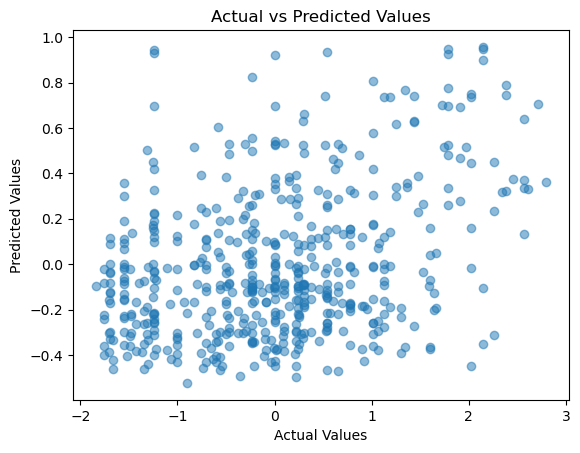

In [1618]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [1619]:
res = pd.DataFrame({'actual': y_test, 'predicted': y_pred})

In [1620]:
res['predicted']

380     0.359090
366    -0.190373
1810   -0.110339
1073   -0.185018
1086   -0.239102
          ...   
54     -0.215717
517    -0.113572
755    -0.003103
1985   -0.036185
2012   -0.093089
Name: predicted, Length: 523, dtype: float64